# Convolutional Autoencoder

Sticking with the MNIST dataset, let's improve our autoencoder's performance using convolutional layers. Again, loading modules and the data.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.utils import shuffle
from scipy.misc import imsave
from scipy.misc import imresize
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle
# from tensorflow_vgg import vgg16|
import collections
import time
import math

# Import GEI dataset 

(128, 88)


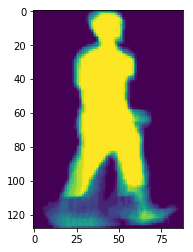

In [6]:
img = imread('{}'.format(os.path.join('./OULP-C1V2_Pack/OULP-GEI-(88x128)-10f/Seq00/0000024', '0000024_55_GEI_10f.png')))
# img = imresize(img, [64, 64], interp='nearest')
print(img.shape)
plt.imshow(img)
plt.show()

In [102]:
# Create Training Data
path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-5f_5/Seq01'
Seq_10f_list = os.listdir(path)
# Seq_10f_list.remove('.DS_Store')

Seq = []
for each_seq in Seq_10f_list:
    seq_path = os.path.join(path, each_seq)
    GEI = []
    for each_GEI in os.listdir(seq_path):
        img = imread('{}'.format(os.path.join(seq_path, each_GEI)))
        img = imresize(img, [64, 64], interp='nearest')
        GEI.append(img)
    Seq.append(np.array(GEI))
Seq = np.array(Seq)
Seq1 = np.ndarray([len(Seq),4,64,64], dtype=float)
for ii, each in enumerate(Seq):
    Seq1[ii] = each

In [103]:
with open('../gait_data/OULP_GEI/GEI64x64_5f_5_Seq01', 'wb') as f:
    np.save(f, Seq1)

# Checkpoint 1

In [15]:
# Create Training Data
Subjects_list = np.load(open(r'../gait_data/OULP_GEI/GEI_subjects_list', mode='rb'))

# GEI_1f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_1f_path', mode='rb'))
# GEI_3f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_3f_path', mode='rb'))
# GEI_5f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_5f_path', mode='rb'))
# GEI_8f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_8f_path', mode='rb'))
# GEI_10f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_10f_path', mode='rb'))
# GEI_13f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_13f_path', mode='rb'))
# GEI_15f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_15f_path', mode='rb'))
GEI_18f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_18f_path', mode='rb'))
GEI_20f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_20f_path', mode='rb'))
# GEI_full_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_full_path', mode='rb'))

# get train, validation, test data
train_x = np.array([])
train_y = np.array([])

val_x = np.array([])
val_y = np.array([])

test_x = np.array([])
test_y = np.array([])

for ii in range(0, 28):
    train_x = np.concatenate([train_x, GEI_18f_path[0 + ii*3254 : 2254 + ii*3254]], axis=0) 
    train_y = np.concatenate([train_y, GEI_20f_path[0 + ii*3254 : 2254 + ii*3254]], axis=0)
        
    val_x = np.concatenate([val_x, GEI_18f_path[2254 + ii*3254 : 2754 + ii*3254]], axis=0) 
    val_y = np.concatenate([val_y, GEI_20f_path[2254 + ii*3254 : 2754 + ii*3254]], axis=0)
        
    test_x = np.concatenate([test_x, GEI_18f_path[2754 + ii*3254 : 3254 + ii*3254]], axis=0) 
    test_y = np.concatenate([test_y, GEI_20f_path[2754 + ii*3254 : 3254 + ii*3254]], axis=0)

train_x, train_y = shuffle(train_x, train_y)
val_x, val_y = shuffle(val_x, val_y)
test_x, test_y = shuffle(test_x, test_y)

In [3]:
# gallery_8f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_1_Seq00', mode='rb'))
# probe_8f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_1_Seq01', mode='rb'))
# gallery_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_1_Seq00', mode='rb'))
# probe_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_1_Seq01', mode='rb'))

# gallery_8f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_2_Seq00', mode='rb'))
# probe_8f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_2_Seq01', mode='rb'))
# gallery_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq00', mode='rb'))
# probe_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq01', mode='rb'))

# gallery_8f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_3_Seq00', mode='rb'))
# probe_8f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_3_Seq01', mode='rb'))
# gallery_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq00', mode='rb'))
# probe_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq01', mode='rb'))

# gallery_8f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_4_Seq00', mode='rb'))
# probe_8f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_4_Seq01', mode='rb'))
# gallery_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq00', mode='rb'))
# probe_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq01', mode='rb'))

# gallery_8f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_5_Seq00', mode='rb'))
# probe_8f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_5_Seq01', mode='rb'))
# gallery_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq00', mode='rb'))
# probe_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq01', mode='rb'))

# gallery_8f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_6_Seq00', mode='rb'))
# probe_8f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_6_Seq01', mode='rb'))
# gallery_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq00', mode='rb'))
# probe_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq01', mode='rb'))

In [4]:
# gallery_8f = gallery_8f/float(255)
# probe_8f = probe_8f/float(255)
# gallery_10f = gallery_10f/float(255)
# probe_10f = probe_10f/float(255)

# gallery_8f_2 = gallery_8f_2/float(255)
# probe_8f_2 = probe_8f_2/float(255)
# gallery_10f_2 = gallery_10f_2/float(255)
# probe_10f_2 = probe_10f_2/float(255)

# gallery_8f_3 = gallery_8f_3/float(255)
# probe_8f_3 = probe_8f_3/float(255)
# gallery_10f_3 = gallery_10f_3/float(255)
# probe_10f_3 = probe_10f_3/float(255)

# gallery_8f_4 = gallery_8f_4/float(255)
# probe_8f_4 = probe_8f_4/float(255)
# gallery_10f_4 = gallery_10f_4/float(255)
# probe_10f_4 = probe_10f_4/float(255)

# gallery_8f_5 = gallery_8f_5/float(255)
# probe_8f_5 = probe_8f_5/float(255)
# gallery_10f_5 = gallery_10f_5/float(255)
# probe_10f_5 = probe_10f_5/float(255)

# gallery_8f_6 = gallery_8f_6/float(255)
# probe_8f_6 = probe_8f_6/float(255)
# gallery_10f_6 = gallery_10f_6/float(255)
# probe_10f_6 = probe_10f_6/float(255)

<br><br><br><br><br><br><br><br><br>

In [5]:
# # Train X
# train_x = np.concatenate([gallery_8f[:2146, 3], probe_8f[:2146, 3], gallery_8f_2[:2146, 3], 
#                           probe_8f_2[:2146, 3], gallery_8f_3[:2146, 3], probe_8f_3[:2146, 3],
#                           gallery_8f_4[:2146, 3], probe_8f_4[:2146, 3], gallery_8f_5[:2146, 3], 
#                           probe_8f_5[:2146, 3], gallery_8f_6[:2146, 3], probe_8f_6[:2146, 3]], axis=0)
# train_x = np.reshape(train_x, [train_x.shape[0], train_x.shape[1], train_x.shape[2], 1])
# # Train Y
# train_y = np.concatenate([gallery_10f[:2146, 3], probe_10f[:2146, 3], gallery_10f_2[:2146, 3], 
#                           probe_10f_2[:2146, 3], gallery_10f_3[:2146, 3], probe_10f_3[:2146, 3],
#                           gallery_10f_4[:2146, 3], probe_10f_4[:2146, 3], gallery_10f_5[:2146, 3], 
#                           probe_10f_5[:2146, 3], gallery_10f_6[:2146, 3], probe_10f_6[:2146, 3]], axis=0)
# train_y = np.reshape(train_y, [train_y.shape[0], train_y.shape[1], train_y.shape[2], 1])
# print('train_x', train_x.shape, 'train_y', train_y.shape)

# # Val X
# val_x = np.concatenate([gallery_8f[2146:2646, 3], gallery_8f_2[2146:2646, 3], gallery_8f_3[2146:2646, 3],
#                         gallery_8f_4[2146:2646, 3], gallery_8f_5[2146:2646, 3], gallery_8f_6[2146:2646, 3],
#                         probe_8f[2146:2646, 3], probe_8f_2[2146:2646, 3], probe_8f_3[2146:2646, 3], 
#                         probe_8f_4[2146:2646, 3], probe_8f_5[2146:2646, 3], probe_8f_6[2146:2646, 3]], axis=0)
# val_x = np.reshape(val_x, [val_x.shape[0], val_x.shape[1], val_x.shape[2], 1])
# # Val Y
# val_y = np.concatenate([gallery_10f[2146:2646, 3], gallery_10f_2[2146:2646, 3], gallery_10f_3[2146:2646, 3], 
#                         gallery_10f_4[2146:2646, 3], gallery_10f_5[2146:2646, 3], gallery_10f_6[2146:2646, 3], 
#                         probe_10f[2146:2646, 3], probe_10f_2[2146:2646, 3], probe_10f_3[2146:2646, 3], 
#                         probe_10f_4[2146:2646, 3], probe_10f_5[2146:2646, 3], probe_10f_6[2146:2646, 3]], axis=0)
# val_y = np.reshape(val_y, [val_y.shape[0], val_y.shape[1], val_y.shape[2], 1])
# print('val_x', val_x.shape, 'val_y', val_y.shape)

# # Test X
# test_x = np.concatenate([gallery_8f[2646:, 3], gallery_8f_2[2646:, 3], gallery_8f_3[2646:, 3],
#                          gallery_8f_4[2646:, 3], gallery_8f_5[2646:, 3], gallery_8f_6[2646:, 3], 
#                          probe_8f[2646:, 3], probe_8f_2[2646:, 3], probe_8f_3[2646:, 3],
#                          probe_8f_4[2646:, 3], probe_8f_5[2646:, 3], probe_8f_6[2646:, 3]], 
#                         axis=0)
# test_x = np.reshape(test_x, [test_x.shape[0], test_x.shape[1], test_x.shape[2], 1])
# # Test Y
# test_y = np.concatenate([gallery_10f[2646:, 3], gallery_10f_2[2646:, 3], gallery_10f_3[2646:, 3], 
#                          gallery_10f_4[2646:, 3], gallery_10f_5[2646:, 3], gallery_10f_6[2646:, 3], 
#                          probe_10f[2646:, 3], probe_10f_2[2646:, 3], probe_10f_3[2646:, 3], probe_10f_4[2646:, 3], 
#                          probe_10f_5[2646:, 3], probe_10f_6[2646:, 3]], axis=0)
# test_y = np.reshape(test_y, [test_y.shape[0], test_y.shape[1], test_y.shape[2], 1])
# print('test_x', test_x.shape, 'test_y', test_y.shape)

# Create Graph

In [16]:
def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)/float(255)
        target_batch = np.array(target_batch)/float(255)
        
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield shuffle(data_batch, target_batch)

def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

In [17]:
def build_inputs_outputs():
    inputs_1 = tf.placeholder(tf.float32, (None, 64, 64, 1), name='inputs_1')
    targets_1 = tf.placeholder(tf.float32, (None, 64, 64, 1), name='targets_1')
    
    return inputs_1, targets_1

def conv_layer(inputs_, weights_name, bias_name, conv_name, pool_name, bn_name, relu_name, add_bacth_norm=True, is_training=True, 
               set_stddev=0.03, out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), pool_size=(2,2), pool_strides=(2,2), 
               keep_prob=0.5):
    ### Encoder
    # e.g. out_dim: 8; kern_size: (3,3); pool_size: (2,2); strides: (2,2);
        
    # filter:[filter_height, filter_width, in_channels, out_channels]
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         inputs_.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name) 
    
    # Set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    # input:[batch, in_height, in_width, in_channels]
    conv2d = tf.nn.bias_add(tf.nn.conv2d(inputs_, weight, stride, padding='SAME', name=conv_name), bias)
    
    # add activation function
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    # add Max pooling
    conv2d = tf.nn.max_pool(conv2d, [1,pool_size[0],pool_size[1],1],\
                                    [1,pool_strides[0],pool_strides[1],1], padding='SAME', name=pool_name)   
    # Now 28x28x
    if add_bacth_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
        
    conv2d_maxpool = tf.layers.dropout(conv2d, rate=keep_prob)
        
    return conv2d_maxpool

#     # Now 14x14x16
#     conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 14x14x8
#     maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
#     # Now 7x7x8
#     conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 7x7x8
#     encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
#     # Now 4x4x8

def deconv_layer(encoded, up_name, weights_name, bias_name, de_conv_name, bn_name, relu_name, add_batch_norm=True, is_training=True, 
                 set_stddev=0.03, up_size=[(2,2),(4,4),(5,5),(6,6)], out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), keep_prob=0.5):
    ### Decoder
    upsample = tf.image.resize_nearest_neighbor(encoded, up_size, name=up_name) # up_size: e.g.(7,7)
    
    # set weight (filter)
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         upsample.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name)
    
    # set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    conv2d = tf.nn.bias_add(tf.nn.conv2d(upsample, weight, stride, padding='SAME', name=de_conv_name),\
                   bias)
    
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    
    conv2d = tf.layers.dropout(conv2d, rate=keep_prob)
    
    return conv2d

#     # Now 7x7x8
#     upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
#     # Now 14x14x8
#     conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 14x14x8
#     upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
#     # Now 28x28x8
#     conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 28x28x16

def output_layer(conv2d, weights_name, bias_name, logits_name, bn_name, decoded_name, add_batch_norm=True, is_training=True, 
                 set_stddev=0.03, out_dim=1, conv_kernsize=(3,3), conv_strides=(1,1)):
    # set weight (filter)
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         conv2d.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name)
    
    # set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    logits = tf.nn.bias_add(tf.nn.conv2d(conv2d, weight, stride, padding='SAME', name=logits_name),\
                   bias)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    #Now 28x28x1
    decoded = tf.nn.sigmoid(logits, name=decoded_name)
    
    return logits, decoded

In [18]:
def build_graph(kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, 
                de_conv_strides, out_kern_size, out_strides, up_size=[(16,16), (32,32), (64,64)]):
    
    # reset graph
    tf.reset_default_graph()
    
    with tf.name_scope('inputs_targets'):
        inputs_1, targets_1 = build_inputs_outputs()
    
    keep_p = tf.placeholder(tf.float32, name="keep_prob")
    
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    training = tf.placeholder(tf.bool, name='training')
    
    with tf.name_scope('conv_layers'):
        
        maxpool_1 = conv_layer(inputs_1, 'conv_weights_1', 'bias_1', 'conv_1', 'pool_1', 'bn_1', 'relu_1', add_bacth_norm=False, 
                               is_training=training, set_stddev=std, out_dim=128, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
        maxpool_2 = conv_layer(maxpool_1, 'conv_weights_2', 'bias_2', 'conv_2', 'pool_2', 'bn_2', 'relu_2', add_bacth_norm=True, 
                               is_training=training, set_stddev=std, out_dim=64, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
        maxpool_3 = conv_layer(maxpool_2, 'conv_weights_3', 'bias_3', 'conv_3', 'pool_3', 'bn_3', 'relu_3', add_bacth_norm=True, 
                               is_training=training, set_stddev=std, out_dim=32, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
#         maxpool_4 = conv_layer(maxpool_3, 'conv_weights_4', 'bias_4', 'conv_4', 'pool_4', 'bn_4', 'relu_4', add_bacth_norm=True, 
#                                is_training=training, set_stddev=std, out_dim=8, conv_kernsize=kern_size, conv_strides=conv_strides, 
#                                pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # Now 4x4x8 as hidden layer
        
    with tf.name_scope('deconv_layers'):
        
        deconv_1 = deconv_layer(maxpool_3, 'up_1', 'deconv_weights_1', 'debias_1', 'deconv_1', 'de_bn_1', 'de_relu_1', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[0], out_dim=32, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
        deconv_2 = deconv_layer(deconv_1, 'up_2', 'deconv_weights_2', 'debias_2', 'deconv_2', 'de_bn_2', 'de_relu_2', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[1], out_dim=64, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
        deconv_3 = deconv_layer(deconv_2, 'up_3', 'deconv_weights_3', 'debias_3', 'deconv_3', 'de_bn_3', 'de_relu_3', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[2], out_dim=128, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
#         deconv_4 = deconv_layer(deconv_3, 'up_4', 'deconv_weights_4', 'debias_4', 'deconv_4', 'de_bn_4', 'de_relu_4', add_batch_norm=True, 
#                               is_training=training, set_stddev=std, up_size=up_size[3], out_dim=64, conv_kernsize=de_kern_size,
#                               conv_strides=de_conv_strides, keep_prob=keep_p)
        
    with tf.name_scope('output_layer'):
       
        logits, decoded = output_layer(deconv_3, 'output_weights', 'outbias_1', 'logits', 'bn', 'decoded', add_batch_norm=False, is_training=training, 
                                       set_stddev=std, out_dim=1, conv_kernsize=out_kern_size, conv_strides=out_strides)
    
    MSE = tf.reduce_mean(tf.losses.mean_squared_error(targets_1, decoded), name='MSE')
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_1, logits=logits, name='loss')
    cost = tf.reduce_mean(loss, name='cost')
#     cost = tf.losses.mean_squared_error(targets_1, decoded)
    opt = tf.train.AdamOptimizer(learning_rate).minimize(MSE)
    
    with tf.name_scope('saver'):
        saver = tf.train.Saver()
        
#     merged = tf.summary.merge_all()
    
    export_nodes = ['inputs_1', 'targets_1', 'maxpool_1', 'maxpool_2', 'maxpool_3', 'deconv_1', 'deconv_2', 
                    'deconv_3', 'training', 'logits', 'decoded', 'loss', 'cost', 'opt', 'saver', 'learning_rate', 'keep_p', 'MSE']
    
    Graph = collections.namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])
    
    return graph

In [19]:
# def get_batches(data, target, batch_size):
#     n_batches = len(data)//batch_size
#     data = data[:batch_size * n_batches]
#     target = target[:batch_size * n_batches]
#     for ii in range(0, batch_size*n_batches, batch_size):
#         data_batch = data[ii:ii + batch_size]
#         target_batch = target[ii:ii + batch_size]
        
#         yield data_batch, target_batch
        
        
# def cal_accuracy(decoded, target):
#     error = abs(decoded - target)
#     Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
#     return Acc

In [20]:
def train(model, epochs, save_string):
    
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        sess.run(tf.global_variables_initializer())
        
        iteration = 1
        mean_val_loss = 0
        mean_val_mse = 0
        mean_val_acc = 0
        count_loss_not_decrease_epochs = 0
        count_acc_not_decrease_epochs = 0
        Last_val_loss = 0
        Last_val_mse = 0
        Last_val_acc = 0
        
        last_saved_acc = 0
        val_batch_size = 50
        
        for e in range(epochs):
            for train_batch, target_batch in get_batches(train_x, train_y, batch_size):
                    
                start = time.time()
                
                feed_1 = {
                        model.inputs_1: train_batch, 
                        model.targets_1: target_batch,
                        model.keep_p: 0.5,
                        model.learning_rate: lr,
                        model.training:True
                        }

                _, decoded_img, train_mse = sess.run([model.opt, model.decoded, model.MSE], feed_dict=feed_1)
                
                train_acc = cal_accuracy(decoded_img, target_batch)
                
                if iteration%25==0:
                    end = time.time()
#                     acc = calculate_accuracy(sess, pred, target_batch, sq_length)
                    print("Epoch: {}/{},".format(e+1, epochs),' '
                          "Iteration: {},".format(iteration),' '
        
                          "Train MSE: {:.4f},".format(train_mse),' '
                          "{:.1f}s /batch.".format((end-start)/5),' '
                          "Train Accuracy: %{:.3f}".format(train_acc))

                ##############################################################
                ######################## VALIDATION ##########################
                ##############################################################
                
                if iteration%35==0:
#                     training = True
#                     validation_loss = []
                    validation_mse = []
                    validation_acc = []
                    
#                     if batch_size >= len(val_x):
#                         val_batch_size = len(val_x)
#                     else: 
#                         val_batch_size = batch_size
                        

                    for ii, (val_batch, val_target_batch) in enumerate(get_batches(val_x, val_y, val_batch_size)):
#                         print(ii, len(val_x)//val_batch_size)
                        feed_2 = {
                                model.inputs_1: val_batch,
                                model.targets_1: val_target_batch,
                                model.keep_p: 1,
                                model.training:True
                                }
                        
                        val_decoded_img, val_mse = sess.run([model.decoded, model.MSE], 
                                                                          feed_dict=feed_2)

                        val_acc = cal_accuracy(val_decoded_img, val_target_batch)
                        
                        
                        validation_mse.append(val_mse)
                        validation_acc.append(val_acc)
                    
                    
                    Last_val_mse = mean_val_mse
                    Last_val_acc = mean_val_acc
                    
                    mean_val_mse = np.mean(np.array(validation_mse))
                    mean_val_acc = np.mean(np.array(validation_acc))
                    
                    print()
                    print(
                          "Validation mse: {:.4f},".format(mean_val_mse),' '
                          "Validation accuracy: %{:.3f},".format(mean_val_acc))
#                           "maxpool_3.shape: {}.".format(max_pool_3[0].shape))
                    print()
        
                    if (mean_val_acc > 92) & (mean_val_acc > last_saved_acc):
                        model.saver.save(sess, r"{}".format(save_string)) 
                        last_saved_acc = mean_val_acc
                        print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
                        
                        
#                     if mean_val_acc > 93.2:
#                         model.saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 91:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 91.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 92.0:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 92.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 93.0:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 93.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
                ####### plot #######
#                 if iteration%500==0:
                    
#                     feed_3 = {
#                             model.inputs_1: val_x[:10],
#                             model.keep_p: 1,
#                             model.training:True
#                             }
                    
#                     fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
#                     in_imgs = val_x[:10]
#                     target_imgs = val_y[:10]
#                     reconstructed = sess.run(model.decoded, feed_dict=feed_3)

##                     plot out
#                     for images, row in zip([in_imgs, target_imgs, reconstructed], axes):
#                         for img, ax in zip(images, row):
#                             ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
#                             ax.get_xaxis().set_visible(False)
#                             ax.get_yaxis().set_visible(False)


#                     fig.tight_layout(pad=0.1)
                            
                    
                    
                    
                    
                iteration += 1
                
            # Early stopping 
#             if mean_val_acc > 89:
#                 break
#             if mean_val_Acc - Last_val_Acc <= -0.3:
#                 count_Acc_not_increase_epochs += 1
#             if Last_val_loss - mean_val_loss <= -0.01:
#                 count_loss_not_decrease_epochs += 1
                
#             if mean_val_Acc - Last_val_Acc <= -2:
#                 break
#             if count_Acc_not_increase_epochs >= 10:
#                 break
#             if count_loss_not_decrease_epochs >= 10:
#                 break
                
        model.saver.save(sess, r"{}".format(save_string))

In [21]:
!mkdir checkpoints_view_invariant

dimension = 128
epochs = 3000
num_layers = 3
batch_size = 80
conv_kern_size = (4,4) #
conv_strides = (1,1) ##
pool_size = (2,2)
pool_strides = (2,2)
# up_size = [(8,8), (16,16), (32,32), (64,64)]
up_size = [(16,16), (32,32), (64,64)]
# up_size = [(32,32), (64,64)]
de_kern_size = (4,4) #
de_conv_strides = (1,1) ##
out_kern_size = (4,4) #
out_strides = (1,1)
std = 0.02

for lr in [0.00006]:
#                 log_string = 'logs/4/lr={},nl={},ls={},bs={}'.format(lr, num_layers, lstm_size, batch_size)
    save_string = './checkpoints_view_invariant/18to20_add-more-data_lr={}_nl={}_bs={}_dim={}.ckpt'.format(
                                                                            lr, num_layers, batch_size, dimension)
                
#             writer to_frame= tf.summary.FileWriter(log_string)
#     build_graph(kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, 
#                 de_conv_strides, out_kern_size, out_strides, up_size=[(16,16), (32,32), (64,64)], set_is_training=True):
    
    model = build_graph(conv_kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, de_conv_strides,
                        out_kern_size, out_strides, up_size=up_size)

    train(model, epochs, save_string)
                
    print(' ')
    print(' ')
    print("leraning_rate={},num_layers={},batch_size={} finished, saved".format(lr, num_layers, batch_size))
    print(' ')
    print(' ')

子目录或文件 checkpoints_view_invariant 已经存在。


Epoch: 1/3000,  Iteration: 25,  Train MSE: 0.0308,  0.1s /batch.  Train Accuracy: %30.396

Validation mse: 0.0214,  Validation accuracy: %38.028,

Epoch: 1/3000,  Iteration: 50,  Train MSE: 0.0157,  0.1s /batch.  Train Accuracy: %51.627

Validation mse: 0.0115,  Validation accuracy: %65.852,

Epoch: 1/3000,  Iteration: 75,  Train MSE: 0.0109,  0.1s /batch.  Train Accuracy: %69.019
Epoch: 1/3000,  Iteration: 100,  Train MSE: 0.0085,  0.1s /batch.  Train Accuracy: %76.924

Validation mse: 0.0080,  Validation accuracy: %77.903,

Epoch: 1/3000,  Iteration: 125,  Train MSE: 0.0068,  0.1s /batch.  Train Accuracy: %81.639

Validation mse: 0.0062,  Validation accuracy: %82.733,

Epoch: 1/3000,  Iteration: 150,  Train MSE: 0.0058,  0.1s /batch.  Train Accuracy: %84.054
Epoch: 1/3000,  Iteration: 175,  Train MSE: 0.0053,  0.1s /batch.  Train Accuracy: %85.171

Validation mse: 0.0052,  Validation accuracy: %85.451,

Epoch: 1/3000,  Iteration: 200,  Train MSE: 0.0047,  0.1s /batch.  Train Accuracy

###################################model been saved， mean accuracy=93.6119, measn MSE=0.0016
Epoch: 2/3000,  Iteration: 1425,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.738

Validation mse: 0.0016,  Validation accuracy: %93.775,

###################################model been saved， mean accuracy=93.7745, measn MSE=0.0016
Epoch: 2/3000,  Iteration: 1450,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.146

Validation mse: 0.0015,  Validation accuracy: %93.870,

###################################model been saved， mean accuracy=93.8703, measn MSE=0.0015
Epoch: 2/3000,  Iteration: 1475,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.093
Epoch: 2/3000,  Iteration: 1500,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.092

Validation mse: 0.0017,  Validation accuracy: %93.380,

Epoch: 2/3000,  Iteration: 1525,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.138

Validation mse: 0.0016,  Validation accuracy: %93.715,

Epoch: 2/3000,  Iteration: 1550, 

Epoch: 4/3000,  Iteration: 2675,  Train MSE: 0.0012,  0.1s /batch.  Train Accuracy: %95.132

Validation mse: 0.0014,  Validation accuracy: %94.373,

Epoch: 4/3000,  Iteration: 2700,  Train MSE: 0.0013,  0.1s /batch.  Train Accuracy: %94.544
Epoch: 4/3000,  Iteration: 2725,  Train MSE: 0.0013,  0.1s /batch.  Train Accuracy: %94.891

Validation mse: 0.0012,  Validation accuracy: %95.067,

###################################model been saved， mean accuracy=95.0674, measn MSE=0.0012
Epoch: 4/3000,  Iteration: 2750,  Train MSE: 0.0013,  0.1s /batch.  Train Accuracy: %94.959

Validation mse: 0.0013,  Validation accuracy: %94.759,

Epoch: 4/3000,  Iteration: 2775,  Train MSE: 0.0012,  0.1s /batch.  Train Accuracy: %95.080
Epoch: 4/3000,  Iteration: 2800,  Train MSE: 0.0014,  0.1s /batch.  Train Accuracy: %94.203

Validation mse: 0.0012,  Validation accuracy: %95.047,

Epoch: 4/3000,  Iteration: 2825,  Train MSE: 0.0012,  0.1s /batch.  Train Accuracy: %94.868

Validation mse: 0.0012,  Validatio

Epoch: 6/3000,  Iteration: 3975,  Train MSE: 0.0011,  0.1s /batch.  Train Accuracy: %95.675

Validation mse: 0.0011,  Validation accuracy: %95.692,

###################################model been saved， mean accuracy=95.6915, measn MSE=0.0011
Epoch: 6/3000,  Iteration: 4000,  Train MSE: 0.0010,  0.1s /batch.  Train Accuracy: %96.013
Epoch: 6/3000,  Iteration: 4025,  Train MSE: 0.0011,  0.1s /batch.  Train Accuracy: %95.258

Validation mse: 0.0011,  Validation accuracy: %95.627,

Epoch: 6/3000,  Iteration: 4050,  Train MSE: 0.0011,  0.1s /batch.  Train Accuracy: %95.680

Validation mse: 0.0011,  Validation accuracy: %95.488,

Epoch: 6/3000,  Iteration: 4075,  Train MSE: 0.0011,  0.1s /batch.  Train Accuracy: %95.757

Validation mse: 0.0011,  Validation accuracy: %95.662,

Epoch: 6/3000,  Iteration: 4100,  Train MSE: 0.0011,  0.1s /batch.  Train Accuracy: %95.740
Epoch: 6/3000,  Iteration: 4125,  Train MSE: 0.0011,  0.1s /batch.  Train Accuracy: %95.619

Validation mse: 0.0011,  Validatio


Validation mse: 0.0010,  Validation accuracy: %95.978,

Epoch: 7/3000,  Iteration: 5375,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.495

Validation mse: 0.0010,  Validation accuracy: %96.091,

Epoch: 7/3000,  Iteration: 5400,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.192
Epoch: 7/3000,  Iteration: 5425,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.383

Validation mse: 0.0010,  Validation accuracy: %96.096,

Epoch: 7/3000,  Iteration: 5450,  Train MSE: 0.0010,  0.1s /batch.  Train Accuracy: %96.116

Validation mse: 0.0010,  Validation accuracy: %96.061,

Epoch: 7/3000,  Iteration: 5475,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.325

Validation mse: 0.0010,  Validation accuracy: %96.104,

Epoch: 7/3000,  Iteration: 5500,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.092
Epoch: 8/3000,  Iteration: 5525,  Train MSE: 0.0011,  0.1s /batch.  Train Accuracy: %95.178

Validation mse: 0.0010,  Validation accuracy: %96.120,

Epoch: 8/3000,


Validation mse: 0.0009,  Validation accuracy: %96.478,

###################################model been saved， mean accuracy=96.4778, measn MSE=0.0009
Epoch: 9/3000,  Iteration: 6800,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.597
Epoch: 9/3000,  Iteration: 6825,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %96.761

Validation mse: 0.0009,  Validation accuracy: %96.391,

Epoch: 9/3000,  Iteration: 6850,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.578

Validation mse: 0.0009,  Validation accuracy: %96.454,

Epoch: 9/3000,  Iteration: 6875,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.317

Validation mse: 0.0009,  Validation accuracy: %96.427,

Epoch: 9/3000,  Iteration: 6900,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.589
Epoch: 9/3000,  Iteration: 6925,  Train MSE: 0.0010,  0.1s /batch.  Train Accuracy: %95.716

Validation mse: 0.0009,  Validation accuracy: %96.349,

Epoch: 9/3000,  Iteration: 6950,  Train MSE: 0.0008,  0.1s /batch.  Tr


Validation mse: 0.0008,  Validation accuracy: %96.788,

###################################model been saved， mean accuracy=96.7882, measn MSE=0.0008
Epoch: 11/3000,  Iteration: 8200,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %96.775
Epoch: 11/3000,  Iteration: 8225,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %97.075

Validation mse: 0.0009,  Validation accuracy: %96.643,

Epoch: 11/3000,  Iteration: 8250,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %96.632

Validation mse: 0.0009,  Validation accuracy: %96.383,

Epoch: 11/3000,  Iteration: 8275,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %96.989

Validation mse: 0.0009,  Validation accuracy: %96.453,

Epoch: 11/3000,  Iteration: 8300,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %96.832
Epoch: 11/3000,  Iteration: 8325,  Train MSE: 0.0009,  0.1s /batch.  Train Accuracy: %96.302

Validation mse: 0.0009,  Validation accuracy: %96.544,

Epoch: 11/3000,  Iteration: 8350,  Train MSE: 0.0008,  0.1s /bat

###################################model been saved， mean accuracy=96.9530, measn MSE=0.0008
Epoch: 13/3000,  Iteration: 9600,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.219
Epoch: 13/3000,  Iteration: 9625,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %97.302

Validation mse: 0.0008,  Validation accuracy: %96.809,

Epoch: 13/3000,  Iteration: 9650,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.278

Validation mse: 0.0009,  Validation accuracy: %96.630,

Epoch: 13/3000,  Iteration: 9675,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %96.971

Validation mse: 0.0008,  Validation accuracy: %96.752,

Epoch: 13/3000,  Iteration: 9700,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %97.187
Epoch: 13/3000,  Iteration: 9725,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %97.204

Validation mse: 0.0008,  Validation accuracy: %96.954,

###################################model been saved， mean accuracy=96.9539, measn MSE=0.0008
Epoch: 13/3000,  Iteration: 

Epoch: 14/3000,  Iteration: 11025,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.242

Validation mse: 0.0008,  Validation accuracy: %96.991,

Epoch: 15/3000,  Iteration: 11050,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.229

Validation mse: 0.0008,  Validation accuracy: %97.082,

Epoch: 15/3000,  Iteration: 11075,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.281

Validation mse: 0.0008,  Validation accuracy: %96.843,

Epoch: 15/3000,  Iteration: 11100,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %96.892
Epoch: 15/3000,  Iteration: 11125,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.273

Validation mse: 0.0008,  Validation accuracy: %96.946,

Epoch: 15/3000,  Iteration: 11150,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.123

Validation mse: 0.0008,  Validation accuracy: %96.924,

Epoch: 15/3000,  Iteration: 11175,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %97.077
Epoch: 15/3000,  Iteration: 11200,  Train MSE: 0.0011,  0


Validation mse: 0.0008,  Validation accuracy: %97.200,

Epoch: 16/3000,  Iteration: 12450,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.188

Validation mse: 0.0008,  Validation accuracy: %97.048,

Epoch: 16/3000,  Iteration: 12475,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %97.123

Validation mse: 0.0007,  Validation accuracy: %97.249,

###################################model been saved， mean accuracy=97.2494, measn MSE=0.0007
Epoch: 16/3000,  Iteration: 12500,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.361
Epoch: 16/3000,  Iteration: 12525,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.203

Validation mse: 0.0008,  Validation accuracy: %97.099,

Epoch: 16/3000,  Iteration: 12550,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.615

Validation mse: 0.0008,  Validation accuracy: %96.912,

Epoch: 16/3000,  Iteration: 12575,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.565
Epoch: 16/3000,  Iteration: 12600,  Train MSE: 0.0007,  0.


Validation mse: 0.0007,  Validation accuracy: %97.387,

###################################model been saved， mean accuracy=97.3868, measn MSE=0.0007
Epoch: 18/3000,  Iteration: 13900,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.401
Epoch: 18/3000,  Iteration: 13925,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %97.037

Validation mse: 0.0007,  Validation accuracy: %97.313,

Epoch: 18/3000,  Iteration: 13950,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.388

Validation mse: 0.0007,  Validation accuracy: %97.309,

Epoch: 18/3000,  Iteration: 13975,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.352
Epoch: 18/3000,  Iteration: 14000,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.292

Validation mse: 0.0008,  Validation accuracy: %97.105,

Epoch: 18/3000,  Iteration: 14025,  Train MSE: 0.0008,  0.1s /batch.  Train Accuracy: %96.980

Validation mse: 0.0008,  Validation accuracy: %97.035,

Epoch: 18/3000,  Iteration: 14050,  Train MSE: 0.0008,  0.


Validation mse: 0.0007,  Validation accuracy: %97.414,

Epoch: 20/3000,  Iteration: 15350,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.892

Validation mse: 0.0007,  Validation accuracy: %97.346,

Epoch: 20/3000,  Iteration: 15375,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.672
Epoch: 20/3000,  Iteration: 15400,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.879

Validation mse: 0.0007,  Validation accuracy: %97.309,

Epoch: 20/3000,  Iteration: 15425,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.659

Validation mse: 0.0008,  Validation accuracy: %97.201,

Epoch: 20/3000,  Iteration: 15450,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.491

Validation mse: 0.0007,  Validation accuracy: %97.417,

Epoch: 20/3000,  Iteration: 15475,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.456
Epoch: 20/3000,  Iteration: 15500,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.742

Validation mse: 0.0007,  Validation accuracy: %97.467,




Validation mse: 0.0007,  Validation accuracy: %97.522,

###################################model been saved， mean accuracy=97.5218, measn MSE=0.0007
Epoch: 22/3000,  Iteration: 16825,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.777

Validation mse: 0.0007,  Validation accuracy: %97.546,

###################################model been saved， mean accuracy=97.5461, measn MSE=0.0007
Epoch: 22/3000,  Iteration: 16850,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.863

Validation mse: 0.0007,  Validation accuracy: %97.562,

###################################model been saved， mean accuracy=97.5621, measn MSE=0.0007
Epoch: 22/3000,  Iteration: 16875,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.614
Epoch: 22/3000,  Iteration: 16900,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.895

Validation mse: 0.0007,  Validation accuracy: %97.515,

Epoch: 22/3000,  Iteration: 16925,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.524

Validation mse: 0.0007


Validation mse: 0.0007,  Validation accuracy: %97.507,

Epoch: 24/3000,  Iteration: 18250,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.825

Validation mse: 0.0007,  Validation accuracy: %97.240,

Epoch: 24/3000,  Iteration: 18275,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.246
Epoch: 24/3000,  Iteration: 18300,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.800

Validation mse: 0.0007,  Validation accuracy: %97.565,

Epoch: 24/3000,  Iteration: 18325,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.680

Validation mse: 0.0007,  Validation accuracy: %97.605,

Epoch: 24/3000,  Iteration: 18350,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.337
Epoch: 24/3000,  Iteration: 18375,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.047

Validation mse: 0.0007,  Validation accuracy: %97.511,

Epoch: 24/3000,  Iteration: 18400,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.022

Validation mse: 0.0007,  Validation accuracy: %97.607,



Epoch: 25/3000,  Iteration: 19700,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.934

Validation mse: 0.0007,  Validation accuracy: %97.698,

###################################model been saved， mean accuracy=97.6976, measn MSE=0.0007
Epoch: 26/3000,  Iteration: 19725,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.684

Validation mse: 0.0007,  Validation accuracy: %97.615,

Epoch: 26/3000,  Iteration: 19750,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.406
Epoch: 26/3000,  Iteration: 19775,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.009

Validation mse: 0.0007,  Validation accuracy: %97.694,

Epoch: 26/3000,  Iteration: 19800,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.198

Validation mse: 0.0007,  Validation accuracy: %97.660,

Epoch: 26/3000,  Iteration: 19825,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.076

Validation mse: 0.0008,  Validation accuracy: %97.163,

Epoch: 26/3000,  Iteration: 19850,  Train MSE: 0.0006,  0.


Validation mse: 0.0007,  Validation accuracy: %97.647,

Epoch: 27/3000,  Iteration: 21200,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.322

Validation mse: 0.0007,  Validation accuracy: %97.635,

Epoch: 27/3000,  Iteration: 21225,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.110

Validation mse: 0.0007,  Validation accuracy: %97.706,

Epoch: 27/3000,  Iteration: 21250,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.109
Epoch: 27/3000,  Iteration: 21275,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.137

Validation mse: 0.0007,  Validation accuracy: %97.690,

Epoch: 28/3000,  Iteration: 21300,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.850

Validation mse: 0.0007,  Validation accuracy: %97.606,

Epoch: 28/3000,  Iteration: 21325,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.876
Epoch: 28/3000,  Iteration: 21350,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.841

Validation mse: 0.0007,  Validation accuracy: %97.599,




Validation mse: 0.0007,  Validation accuracy: %97.529,

Epoch: 29/3000,  Iteration: 22700,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.002

Validation mse: 0.0007,  Validation accuracy: %97.726,

Epoch: 29/3000,  Iteration: 22725,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.092
Epoch: 29/3000,  Iteration: 22750,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.963

Validation mse: 0.0007,  Validation accuracy: %97.539,

Epoch: 29/3000,  Iteration: 22775,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.904

Validation mse: 0.0007,  Validation accuracy: %97.517,

Epoch: 29/3000,  Iteration: 22800,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.804

Validation mse: 0.0006,  Validation accuracy: %97.778,

###################################model been saved， mean accuracy=97.7784, measn MSE=0.0006
Epoch: 29/3000,  Iteration: 22825,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.076
Epoch: 29/3000,  Iteration: 22850,  Train MSE: 0.0006,  0.


Validation mse: 0.0006,  Validation accuracy: %97.759,

Epoch: 31/3000,  Iteration: 24200,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.141

Validation mse: 0.0007,  Validation accuracy: %97.674,

Epoch: 31/3000,  Iteration: 24225,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.376
Epoch: 31/3000,  Iteration: 24250,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.123

Validation mse: 0.0007,  Validation accuracy: %97.479,

Epoch: 31/3000,  Iteration: 24275,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.230

Validation mse: 0.0007,  Validation accuracy: %97.578,

Epoch: 31/3000,  Iteration: 24300,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.079
Epoch: 31/3000,  Iteration: 24325,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.045

Validation mse: 0.0007,  Validation accuracy: %97.662,

Epoch: 31/3000,  Iteration: 24350,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.991

Validation mse: 0.0007,  Validation accuracy: %97.597,




Validation mse: 0.0006,  Validation accuracy: %97.785,

Epoch: 33/3000,  Iteration: 25700,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.412
Epoch: 33/3000,  Iteration: 25725,  Train MSE: 0.0007,  0.1s /batch.  Train Accuracy: %97.536

Validation mse: 0.0007,  Validation accuracy: %97.705,

Epoch: 33/3000,  Iteration: 25750,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.674

Validation mse: 0.0007,  Validation accuracy: %97.714,

Epoch: 33/3000,  Iteration: 25775,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.195

Validation mse: 0.0006,  Validation accuracy: %97.757,

Epoch: 33/3000,  Iteration: 25800,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.326
Epoch: 33/3000,  Iteration: 25825,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.241

Validation mse: 0.0007,  Validation accuracy: %97.634,

Epoch: 33/3000,  Iteration: 25850,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.187

Validation mse: 0.0007,  Validation accuracy: %97.563,




Validation mse: 0.0007,  Validation accuracy: %97.611,

Epoch: 35/3000,  Iteration: 27200,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.947
Epoch: 35/3000,  Iteration: 27225,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.952

Validation mse: 0.0007,  Validation accuracy: %97.690,

Epoch: 35/3000,  Iteration: 27250,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.048

Validation mse: 0.0006,  Validation accuracy: %97.849,

Epoch: 35/3000,  Iteration: 27275,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.179
Epoch: 35/3000,  Iteration: 27300,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.072

Validation mse: 0.0007,  Validation accuracy: %97.704,

Epoch: 35/3000,  Iteration: 27325,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.430

Validation mse: 0.0006,  Validation accuracy: %97.831,

Epoch: 35/3000,  Iteration: 27350,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.410

Validation mse: 0.0006,  Validation accuracy: %97.838,




Validation mse: 0.0006,  Validation accuracy: %97.851,

Epoch: 37/3000,  Iteration: 28675,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.011
Epoch: 37/3000,  Iteration: 28700,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.079

Validation mse: 0.0007,  Validation accuracy: %97.731,

Epoch: 37/3000,  Iteration: 28725,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.254

Validation mse: 0.0006,  Validation accuracy: %97.809,

Epoch: 37/3000,  Iteration: 28750,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.890

Validation mse: 0.0006,  Validation accuracy: %97.816,

Epoch: 37/3000,  Iteration: 28775,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.150
Epoch: 37/3000,  Iteration: 28800,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.318

Validation mse: 0.0006,  Validation accuracy: %97.887,

Epoch: 37/3000,  Iteration: 28825,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.232

Validation mse: 0.0006,  Validation accuracy: %97.787,



Epoch: 39/3000,  Iteration: 30125,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.236

Validation mse: 0.0007,  Validation accuracy: %97.751,

Epoch: 39/3000,  Iteration: 30150,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.946

Validation mse: 0.0007,  Validation accuracy: %97.693,

Epoch: 39/3000,  Iteration: 30175,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.137
Epoch: 39/3000,  Iteration: 30200,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.322

Validation mse: 0.0006,  Validation accuracy: %97.961,

###################################model been saved， mean accuracy=97.9608, measn MSE=0.0006
Epoch: 39/3000,  Iteration: 30225,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.315

Validation mse: 0.0006,  Validation accuracy: %97.924,

Epoch: 39/3000,  Iteration: 30250,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.287
Epoch: 39/3000,  Iteration: 30275,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.314

Validation mse: 0.00

Epoch: 41/3000,  Iteration: 31575,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.184
Epoch: 41/3000,  Iteration: 31600,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.485

Validation mse: 0.0006,  Validation accuracy: %97.960,

Epoch: 41/3000,  Iteration: 31625,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.335

Validation mse: 0.0006,  Validation accuracy: %97.828,

Epoch: 41/3000,  Iteration: 31650,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.065
Epoch: 41/3000,  Iteration: 31675,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.754

Validation mse: 0.0006,  Validation accuracy: %97.899,

Epoch: 41/3000,  Iteration: 31700,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.988

Validation mse: 0.0006,  Validation accuracy: %97.874,

Epoch: 41/3000,  Iteration: 31725,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.724

Validation mse: 0.0007,  Validation accuracy: %97.637,

Epoch: 41/3000,  Iteration: 31750,  Train MSE: 0.0005,  0


Validation mse: 0.0006,  Validation accuracy: %97.996,

Epoch: 43/3000,  Iteration: 33100,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.452

Validation mse: 0.0006,  Validation accuracy: %97.870,

Epoch: 43/3000,  Iteration: 33125,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %97.981

Validation mse: 0.0006,  Validation accuracy: %97.797,

Epoch: 43/3000,  Iteration: 33150,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.480
Epoch: 43/3000,  Iteration: 33175,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.251

Validation mse: 0.0006,  Validation accuracy: %97.988,

Epoch: 43/3000,  Iteration: 33200,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.293

Validation mse: 0.0006,  Validation accuracy: %97.826,

Epoch: 43/3000,  Iteration: 33225,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.443
Epoch: 43/3000,  Iteration: 33250,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.308

Validation mse: 0.0006,  Validation accuracy: %97.918,



Epoch: 44/3000,  Iteration: 34575,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.332

Validation mse: 0.0006,  Validation accuracy: %97.907,

Epoch: 44/3000,  Iteration: 34600,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.331

Validation mse: 0.0006,  Validation accuracy: %98.000,

Epoch: 44/3000,  Iteration: 34625,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.354
Epoch: 44/3000,  Iteration: 34650,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.191

Validation mse: 0.0006,  Validation accuracy: %97.949,

Epoch: 45/3000,  Iteration: 34675,  Train MSE: 0.0006,  0.1s /batch.  Train Accuracy: %98.208

Validation mse: 0.0006,  Validation accuracy: %97.896,

Epoch: 45/3000,  Iteration: 34700,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.313

Validation mse: 0.0007,  Validation accuracy: %97.733,

Epoch: 45/3000,  Iteration: 34725,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.334
Epoch: 45/3000,  Iteration: 34750,  Train MSE: 0.0006,  0


Validation mse: 0.0006,  Validation accuracy: %98.029,

Epoch: 46/3000,  Iteration: 36075,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.369

Validation mse: 0.0006,  Validation accuracy: %98.048,

Epoch: 46/3000,  Iteration: 36100,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.260

Validation mse: 0.0006,  Validation accuracy: %98.038,

Epoch: 46/3000,  Iteration: 36125,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.394
Epoch: 46/3000,  Iteration: 36150,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.433

Validation mse: 0.0006,  Validation accuracy: %97.939,

Epoch: 46/3000,  Iteration: 36175,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.415

Validation mse: 0.0006,  Validation accuracy: %98.034,

Epoch: 46/3000,  Iteration: 36200,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.479
Epoch: 46/3000,  Iteration: 36225,  Train MSE: 0.0005,  0.1s /batch.  Train Accuracy: %98.419

Validation mse: 0.0006,  Validation accuracy: %97.963,



KeyboardInterrupt: 

In [ ]:
128,89.035

# Test Model: 18f-20f_add_more_data_E2E_lr=0.00006_bs=80_nl=3.ckpt

In [2]:
val_x = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_val_x', mode='rb'))
val_y = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_val_y', mode='rb'))
test_x = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_test_x', mode='rb'))
test_y = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_test_y', mode='rb'))

In [3]:
def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)/float(255)
        target_batch = np.array(target_batch)/float(255)
        
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield data_batch, target_batch
        
def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

def save_decoded(decoded_batch, save_path, batch_number, test_batch_size):
    reshape = np.reshape(decoded_batch, [decoded_batch.shape[0], decoded_batch.shape[1], decoded_batch.shape[2]])
    for ii, image in enumerate(reshape):
        imsave('{}/{}.png'.format(save_path, ii + batch_number*test_batch_size + 1), image)

In [4]:
idx = 7
target_f = '20f'
for n_frames in ['18f']: 
    for g_or_p in ['gallery', 'probe']:

        for ii in range(0,14):

            if g_or_p == 'gallery':
                t_x = np.concatenate([val_x[ii*500 + idx*14000:(ii+1)*500 + idx*14000], 
                                          test_x[ii*500 + idx*14000:(ii+1)*500 + idx*14000]], axis=0) 
                t_y = np.concatenate([val_x[ii*500 + (idx+1)*14000:(ii+1)*500 + (idx+1)*14000], 
                                          test_x[ii*500 + (idx+1)*14000:(ii+1)*500 + (idx+1)*14000]], axis=0)    
            else:
                t_x = np.concatenate([val_x[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000], 
                                          test_x[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000]], axis=0) 
                t_y = np.concatenate([val_x[ii*500 + 7000 + (idx+1)*14000:(ii+1)*500 + 7000 + (idx+1)*14000], 
                                          test_x[ii*500 + 7000 + (idx+1)*14000:(ii+1)*500 + 7000 + (idx+1)*14000]], axis=0)  

            New_folder_path = './OULP-C1V2_Pack/OULP-GEI-(64x64)-{}-{}_individual_ITCNet/decoded_{}_{}-{}_{}'.format(n_frames, target_f, g_or_p, n_frames, target_f, ii+1)
            os.makedirs(New_folder_path)

            test_batch_size = 50
            loaded_graph = tf.Graph()
            save_model_path = './checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
            with tf.Session(graph=loaded_graph) as sess:
                    # Load model
                loader = tf.train.import_meta_graph(save_model_path + '.meta')
                loader.restore(sess, save_model_path)

                    # Get Tensors from loaded model
                test_inputs = loaded_graph.get_tensor_by_name('inputs_targets/inputs_1:0')
                test_targets = loaded_graph.get_tensor_by_name('inputs_targets/targets_1:0')
                test_training = loaded_graph.get_tensor_by_name('training:0')
                test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')

                test_decoded = loaded_graph.get_tensor_by_name('output_layer/decoded:0')
                test_MSE= loaded_graph.get_tensor_by_name('MSE:0')
                
#                 test_inputs = loaded_graph.get_tensor_by_name('inputs:0')
#                 test_targets = loaded_graph.get_tensor_by_name('targets:0')
#                 test_training = loaded_graph.get_tensor_by_name('training:0')
#                 test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')
#                 test_decoded = loaded_graph.get_tensor_by_name('output_layer/output:0')
#                 test_MSE = loaded_graph.get_tensor_by_name('MSE:0')

                test_mse = []
                test_acc = []
                mean_test_mse = 0
                mean_test_acc = 0

                for idx2, (test_batch, test_target_batch) in enumerate(get_batches(t_x, t_y, test_batch_size)):
            #                                          np.concatenate([val_x[3000+ii*500:3000+(ii+1)*500], test_x[3000+ii*500:3000+(ii+1)*500]], axis=0), 
            #                                          np.concatenate([val_y[3000+ii*500:3000+(ii+1)*500], test_y[3000+ii*500:3000+(ii+1)*500]], axis=0), test_batch_size)):


                    feed_dict = {test_inputs: test_batch,
                                    test_targets: test_target_batch,
                                    test_training: 1,
                                    test_training:True
                                    }

                    test_mean_squared_error, test_decoded_img = sess.run([test_MSE, test_decoded], feed_dict=feed_dict)
                    save_decoded(test_decoded_img, New_folder_path, idx2, test_batch_size)

                    test_ACC = cal_accuracy(test_decoded_img, test_target_batch)

                    test_mse.append(test_mean_squared_error)
                    test_acc.append(test_ACC)

                mean_test_mse = np.mean(np.array(test_mse))
                mean_test_acc = np.mean(np.array(test_acc))

                print('mean_test_mse: {:.4f}'.format(mean_test_mse))
                print('mean_test_acc: {:.4f}'.format(mean_test_acc))

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0010
mean_test_acc: 95.4667
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0006
mean_test_acc: 98.2627
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0006
mean_test_acc: 97.9900
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0006
mean_test_acc: 97.9900
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0006
mean_test_acc: 97.9899
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/18to20_add-more-data_lr=6e-05_n

# calculate mean loss and mean acc

In [5]:
target_f = '20f'
for n_frames in ['18f']:
    n_frames_list = np.array([])
    
    for g_or_p in ['gallery', 'probe']:
        for start_frames in np.arange(1, 15):
            
            path = r'./OULP-C1V2_Pack/OULP-GEI-(64x64)-{}-{}_individual_ITCNet/decoded_{}_{}-{}_{}'.format(n_frames, 
                                                            target_f, g_or_p, n_frames, target_f, start_frames)
            path_list = []
            for ii in np.arange(1, 1001):
                path_list.append(os.path.join(path, '{}.png'.format(ii)))
            n_frames_list = np.concatenate([n_frames_list, np.array(path_list)], axis=0)
        
    with open('../gait_data/OULP_GEI/PredforTest_{}-{}'.format(n_frames, target_f), 'wb') as f:
        np.save(f, n_frames_list)

In [6]:
PredforTest_18f_20f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_18f-20f', mode='rb'))

# 18f
idx = 8

target_x = np.array([])
for ii in range(14):
    target_x = np.concatenate([target_x, np.concatenate([val_x[14000*idx + ii*500:14000*idx + 500 + ii*500], 
                                                         test_x[14000*idx + ii*500:14000*idx + 500 + ii*500]], axis=0)])
for ii in range(14):
    target_x = np.concatenate([target_x, np.concatenate([val_x[14000*idx + ii*500 + 7000: 14000*idx + 500 + ii*500 + 7000], 
                                                         test_x[14000*idx + ii*500 + 7000: 14000*idx + 500 + ii*500 + 7000]], axis=0)])

In [7]:
from skimage.measure import compare_ssim as ssim
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def cal_mean_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]))*100
    
    return Acc

In [8]:
Std_m = []
Std_s = []
Std_acc = []
M = []
S = []
ACC = []
test_set = PredforTest_18f_20f

for g_or_p in ['gallery', 'probe']:
    for idx in range(14):
        if g_or_p == 'gallery':
            pred_idx = test_set[1000*idx:1000 + 1000*idx]
            target_idx = target_x[1000*idx:1000 + 1000*idx]
        else:
            pred_idx = test_set[14000+1000*idx:14000 + 1000 + 1000*idx]
            target_idx = target_x[14000+1000*idx:14000 + 1000 + 1000*idx]
            
        m  = []
        s = []
        acc = []
        for ii in range(1000):
            pred = imread(pred_idx[ii])
            target = imresize(imread(target_idx[ii]), [64,64], interp='nearest')/255.0
            
            m.append(mse(pred.astype(float), target.astype(float)))
            s.append(ssim(pred.astype(float), target.astype(float)))
            acc.append(cal_mean_accuracy(pred.astype(float), target.astype(float)))
        
        Std_m.append(m)
        Std_s.append(s)
        Std_acc.append(acc)
        M.append(np.mean(np.array(m)))
        S.append(np.mean(np.array(s)))
        ACC.append(np.mean(np.array(acc)))

In [9]:
M = np.array(M)
S = np.array(S)
ACC = np.array(ACC)

MSE = (M[:14] + M[14:])/2
SSIM = (S[:14] + S[14:])/2
ACCURACY = (ACC[:14] + ACC[14:])/2

print('mean mse {:.4f}'.format(np.mean(MSE)))
print('mse std {:.4f}'.format(np.std(np.array(Std_m))))
print('             ')

print('mean ssim {:.4f}'.format(np.mean(SSIM)))
print('std ssim {:.4f}'.format(np.std(np.array(Std_s))))
print('             ')

print('mean Acc {:.4f}'.format(np.mean(ACCURACY)))
print('std Acc {:.4f}'.format(np.std(np.array(Std_acc))))

mean mse 0.0006
mse std 0.0002
             
mean ssim 0.9787
std ssim 0.0094
             
mean Acc 98.0683
std Acc 1.0682


# get some samples

In [13]:
sample_images = np.reshape(test_x[1000:1010], [10, 64, 64])
sample_targets = np.reshape(test_y[1000:1010], [10, 64, 64])

for ii, (s_img, t_img) in enumerate(zip(sample_images, sample_targets)):
    imsave('./OULP-C1V2_Pack/Samples/5f-10f-samples/samples/{}.png'.format(ii+1), s_img)
    imsave('./OULP-C1V2_Pack/Samples/5f-10f-samples/targets/{}.png'.format(ii+1), t_img)